In [5]:
import torch
import torch.nn as nn
import math

In [36]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 200):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        # pe = pe.squeeze(1)
        self.register_buffer('pe', pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Arguments:
            x: torch.Tensor, shape ``[seq_len, batch_size, embedding_dim]``
        """
        x = x.unsqueeze(-2) + self.pe[:x.size(1)]
        # x = self.dropout(x)
        x = x.squeeze(-2)
        return x

True


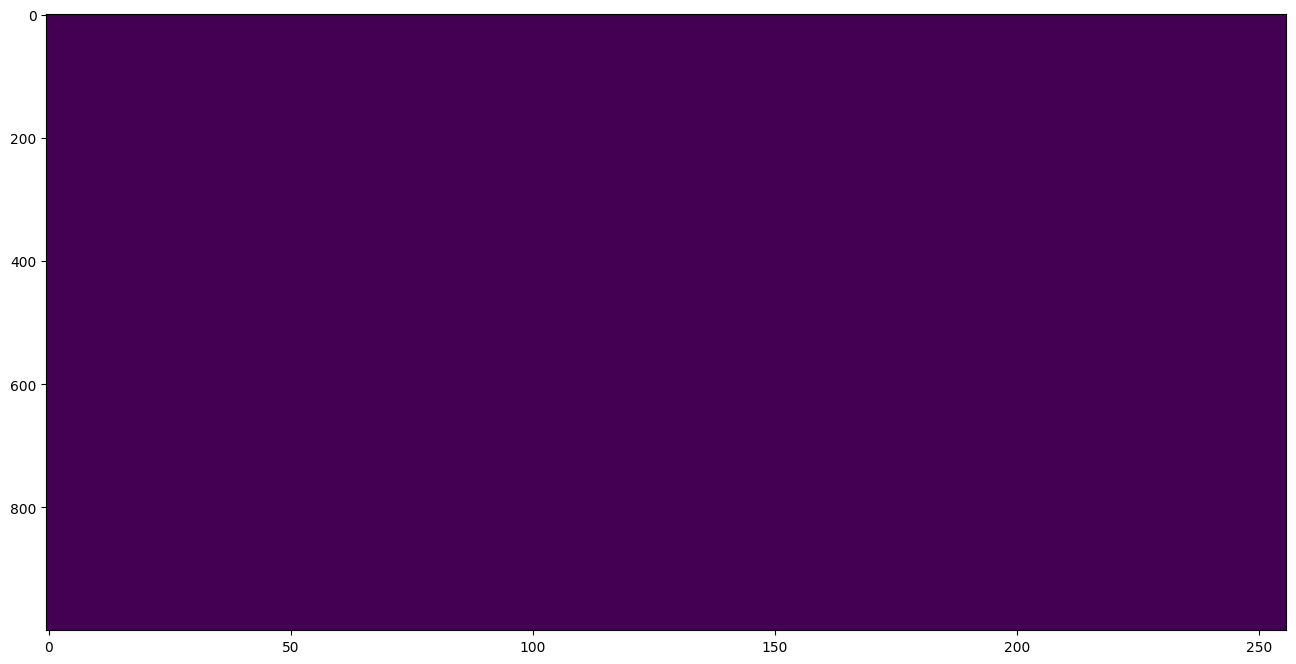

In [44]:
# Create zeros tensor and plot added positional encoding
zero_tensor = torch.zeros(16, 1000, 256)
pe = PositionalEncoding(256, max_len=5000)
pe_tensor = pe(zero_tensor)
# pe_tensor = pe_tensor.squeeze(1)#.permute(1, 0)
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.imshow(pe_tensor[0] - pe_tensor[1], aspect='auto')

# Sum of positional encoding for two different sequences should be the same
print((pe_tensor[0] - pe_tensor[1]).allclose(torch.zeros_like(pe_tensor[0] - pe_tensor[1])))
